In [309]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [310]:
import pandas as pd


df = pd.read_csv(path+"creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


50.0 %
50.0 %


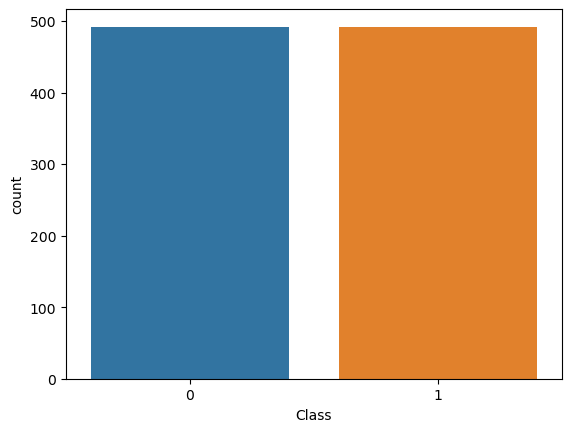

In [311]:
from matplotlib import pyplot as plt
import seaborn as sns


fraude = df[df['Class'] == 1]
no_fraude = df[df['Class'] == 0].sample(len(fraude))


df=pd.concat([fraude,no_fraude])
fig,ax=plt.subplots()
sns.countplot(data=df,x='Class')

print(len(fraude)*100/len(df),"%")
print(len(no_fraude)*100/len(df),"%")

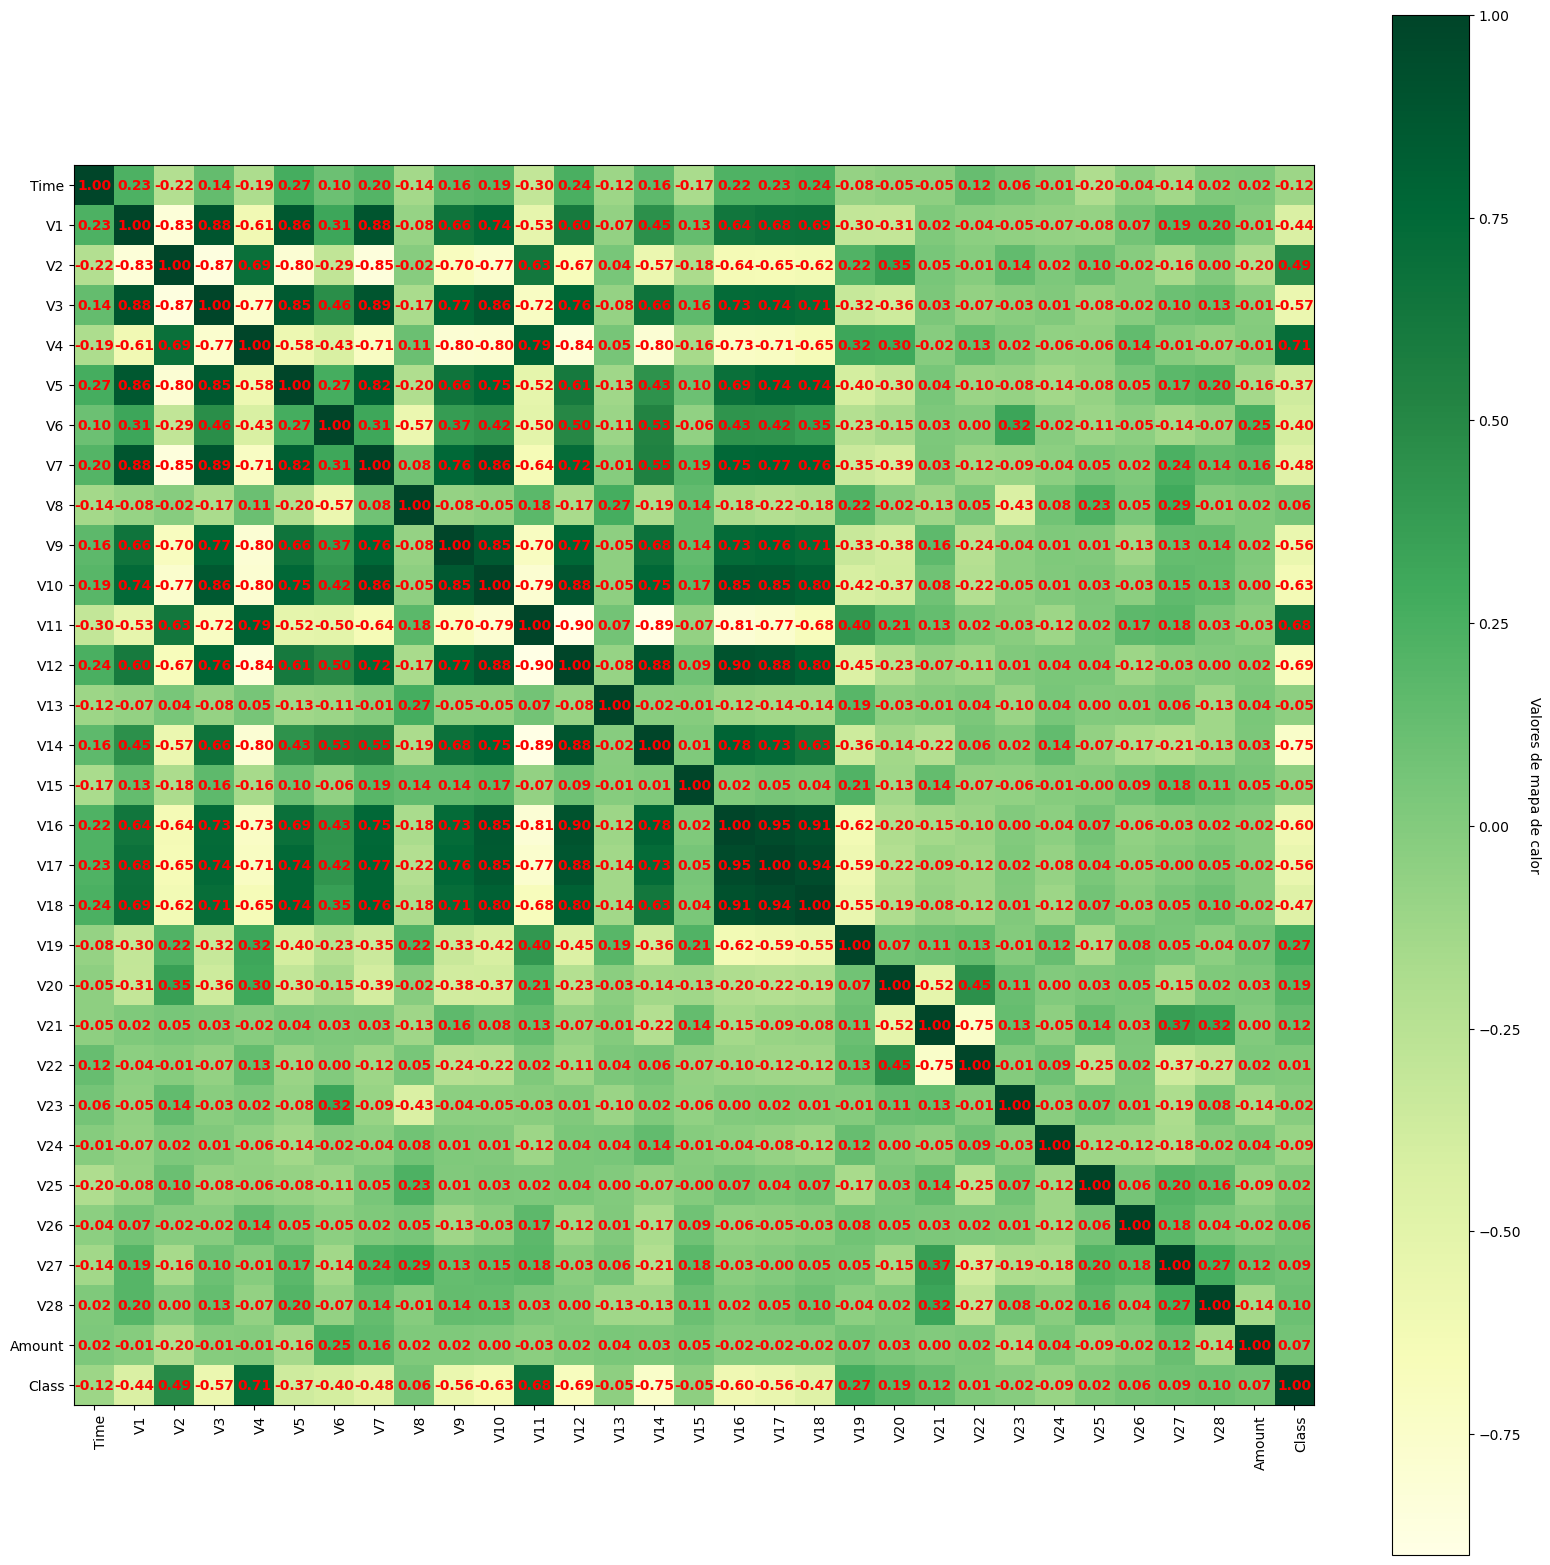

In [312]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = df.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(20,20),weight="bold",textColor="red")

In [313]:
df=df[corr_matrix[(corr_matrix['Class']>0.1) | (corr_matrix['Class']<-0.1)].index]

In [314]:
df=df.sample(frac=1,random_state=42)

In [315]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [316]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21
49229,43965.0,1.047657,0.115101,1.615978,2.936669,-0.763466,0.680616,-0.655334,0.381026,0.329488,-0.786892,0.704428,-0.745084,-0.373756,0.380773,-0.907673,-1.049525,-0.208440,0.073746
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,-3.747646,-4.230984,4.436319,-4.503801,-9.861372,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261
144259,85979.0,-7.101593,5.762964,-0.636182,-2.042941,-0.494066,-0.464916,1.680652,6.193398,10.812653,3.096658,0.607589,-3.385452,-1.247544,-1.347899,-1.113164,-0.976525,4.354030,-1.564364
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,-1.315646,-2.796332,-0.448794,-2.562602,-1.181669,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,-4.684952,-8.537758,6.348979,-8.681609,-11.608002,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,-3.880663,-3.976525,5.730084,-5.031868,-10.787051,-1.104217,0.636413,0.994101,-0.688721,-0.108006,0.247913
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,-0.546890,-0.713474,1.274629,0.023682,0.727242,0.348038,-0.566390,0.216016,-1.140376,0.634184,0.325575
253874,156471.0,2.040609,-0.202946,-1.204635,0.238028,-0.044915,-0.736658,-0.011925,0.498076,0.280240,0.452810,0.339166,0.708320,0.244660,-0.581650,-0.112475,0.564709,-0.284833,-0.273225
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-0.556685,-4.485483,1.903999,-2.644219,-4.691151,-2.553251,-3.483436,-0.064852,1.490329,0.532145,-0.073205


In [317]:
import time
from sklearn.decomposition import PCA, TruncatedSVD


t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA le llevó {:.2} s".format(t1 - t0))

t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD le llevó {:.2} s".format(t1 - t0))

PCA le llevó 0.004 s
Truncated SVD le llevó 0.0055 s


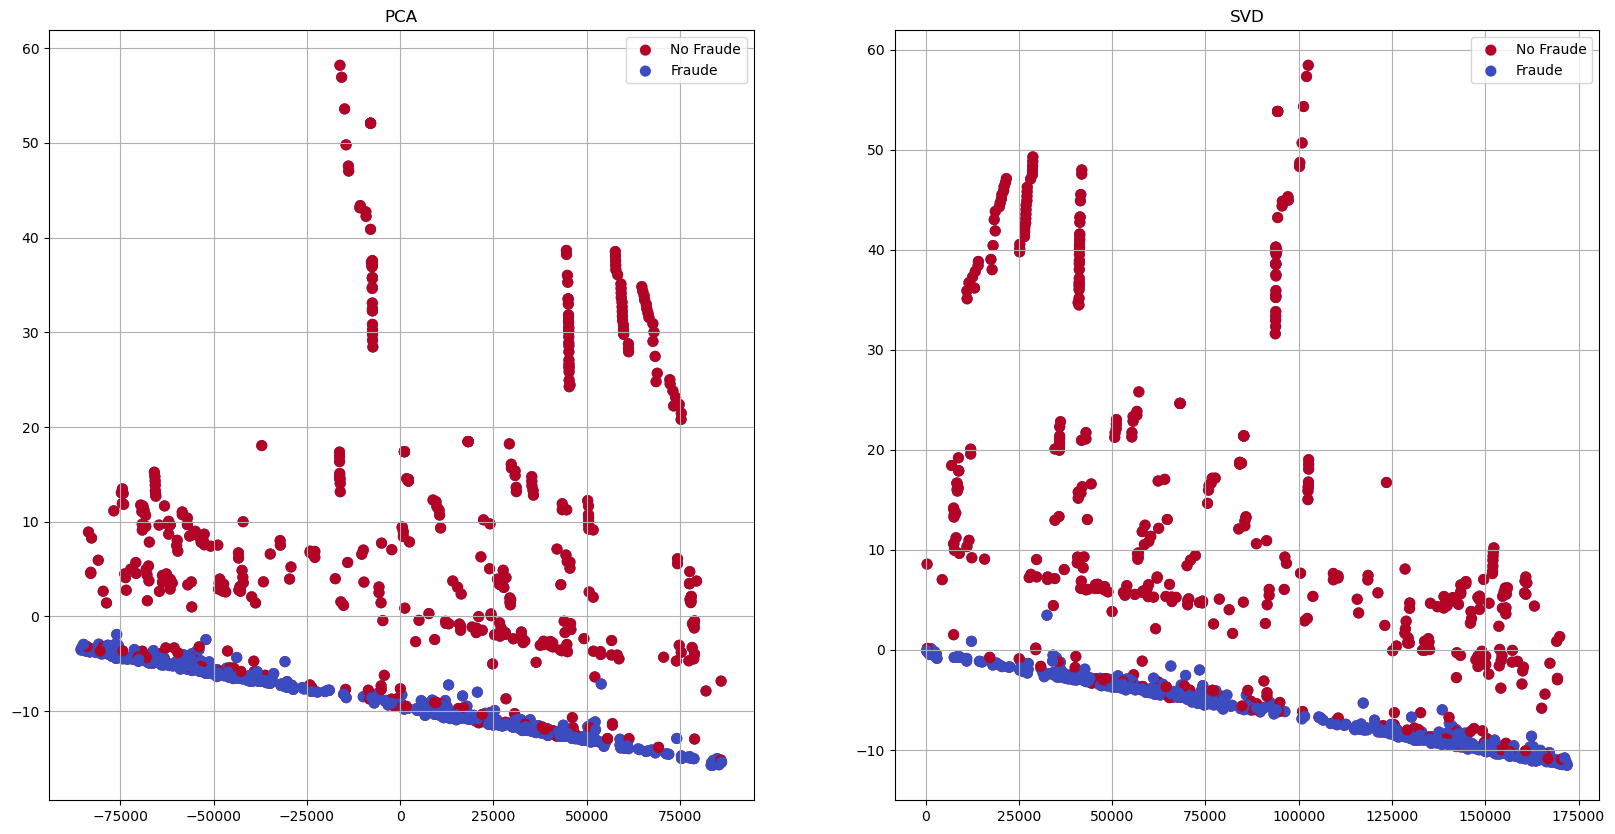

In [318]:
fig,axs=plt.subplots(1,2,figsize=(20,10))

axs[0].scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==0),label="No Fraude",linewidth=2,cmap="coolwarm")
axs[0].scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==1),label="Fraude",linewidth=2,cmap="coolwarm")
axs[0].set_title("PCA")
axs[0].grid(True)


axs[1].scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=(Y==0),label="No Fraude",linewidth=2,cmap="coolwarm")
axs[1].scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=(Y==1),label="Fraude",linewidth=2,cmap="coolwarm")
axs[1].set_title("SVD")
axs[1].grid(True)

axs[0].legend()
axs[1].legend()

In [319]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [320]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    "SGDClassifier":SGDClassifier('log_loss'),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    #'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

In [321]:

import numpy as np
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    X_train_contiguous = np.ascontiguousarray(X_train)
    X_test_contiguous = np.ascontiguousarray(X_test)
    model.fit(X_train_contiguous, y_train)
    y_pred = model.predict(X_test_contiguous)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    training_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\t{name} Cross_Score: {round(training_score.mean(),2)*100}","%")

SGDClassifier Accuracy: 0.44
	SGDClassifier Cross_Score: 50.0 %
Logistic Regression Accuracy: 0.92
	Logistic Regression Cross_Score: 93.0 %
Decision Tree Accuracy: 0.92
	Decision Tree Cross_Score: 92.0 %
Random Forest Accuracy: 0.93
	Random Forest Cross_Score: 94.0 %
SVM Accuracy: 0.50
	SVM Cross_Score: 53.0 %
Gradient Boosting Accuracy: 0.95
	Gradient Boosting Cross_Score: 94.0 %
XGBoost Accuracy: 0.95
	XGBoost Cross_Score: 93.0 %
AdaBoost Accuracy: 0.94
	AdaBoost Cross_Score: 92.0 %
Naive Bayes Accuracy: 0.90
	Naive Bayes Cross_Score: 88.0 %
MLP Neural Network Accuracy: 0.56
	MLP Neural Network Cross_Score: 57.99999999999999 %


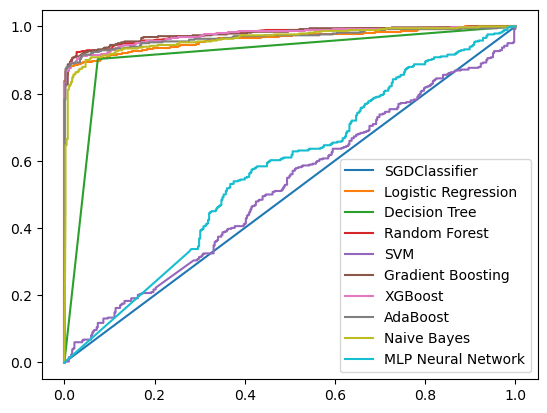

In [322]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import roc_curve


for name, model in models.items():
    y_probas = cross_val_predict(model, X_train, y_train, cv=3,
                                    method="predict_proba")
    y_scores_forest = y_probas[:, 1]
    fpr, tpr, thresholds_forest = roc_curve(y_train, y_scores_forest, pos_label=1,drop_intermediate=True)
    plt.plot(fpr, tpr, label=name)
    plt.legend()

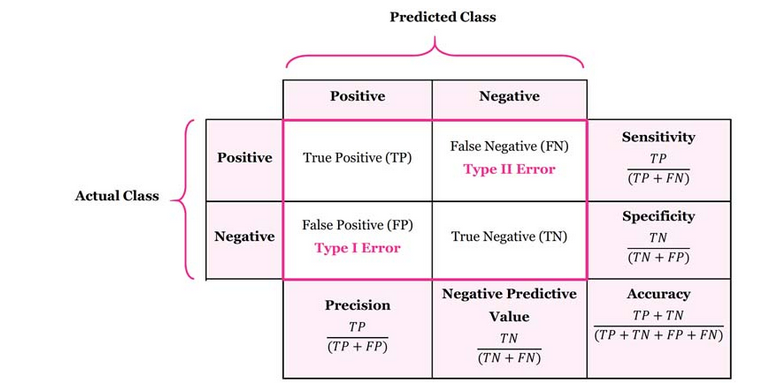

In [341]:
import optuna

import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb


def objective(trial):
    
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our mode
        #'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"]),
        #'device':'gpu',
        'eta': trial.suggest_float('eta', 0.75, 2),
        'max_depth': trial.suggest_int('max_depth', 2, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 9),
        'gamma': trial.suggest_float('gamma', 0.1, 1),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1),
    }

    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

study.best_params




[I 2024-03-18 19:34:07,608] A new study created in memory with name: no-name-93ee5ba1-9034-43c0-a4bd-a6d9149273e6
[I 2024-03-18 19:34:07,914] Trial 0 finished with value: 977898056.2054069 and parameters: {'eta': 1.551316983605032, 'max_depth': 7, 'learning_rate': 0.8508885619648368, 'n_estimators': 323, 'min_child_weight': 4, 'gamma': 0.4826480618995812, 'subsample': 0.20313814366006477, 'colsample_bytree': 0.39132750869986077, 'reg_alpha': 0.6510917941895907, 'reg_lambda': 0.6446119399427328}. Best is trial 0 with value: 977898056.2054069.
[I 2024-03-18 19:34:08,022] Trial 1 finished with value: 0.05086240663971588 and parameters: {'eta': 1.1733277115412046, 'max_depth': 2, 'learning_rate': 0.45936091501616505, 'n_estimators': 218, 'min_child_weight': 3, 'gamma': 0.26026560373644714, 'subsample': 0.8623595556795336, 'colsample_bytree': 0.9258869973510185, 'reg_alpha': 0.7763947061573951, 'reg_lambda': 0.9194592643242118}. Best is trial 1 with value: 0.05086240663971588.
[I 2024-03-18

{'eta': 1.0614703162813215,
 'max_depth': 9,
 'learning_rate': 0.18186445651351504,
 'n_estimators': 328,
 'min_child_weight': 9,
 'gamma': 0.11938419072612107,
 'subsample': 0.8075394275609112,
 'colsample_bytree': 0.8467318602801079,
 'reg_alpha': 0.11587412517974059,
 'reg_lambda': 0.11261081868752931}

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [323]:
import xgboost


model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [324]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

datos_prueba =  X_test
y_pred = model.predict(datos_prueba)
y_reales = y_test
print("SCORE:",model.score(X_test,y_test))
print("R2 SCORE:",r2_score(y_test, y_pred))

model_score = cross_val_score(model, X_train, y_train,
                            scoring = "neg_mean_squared_error", cv=3)
root_lin_score = np.sqrt(-model_score)
predicciones=model.predict(X_test)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)

print(f"MEDIA DE ERROR AL CUADRADO: {mse} -- ERROR ABSOLUTO: {mae}")
print("MEDIA AL CUADRADO:",root_lin_score.mean())
print("ABSOLUTO AL CUADRADO:",root_lin_score.std())
print("CROSS SCORE",root_lin_score)


SCORE: 0.949238578680203
R2 SCORE: 0.7941483803552769
MEDIA DE ERROR AL CUADRADO: 0.22530295452966645 -- ERROR ABSOLUTO: 0.050761421319796954
MEDIA AL CUADRADO: 0.2517442951147359
ABSOLUTO AL CUADRADO: 0.012863856645858993
CROSS SCORE [0.23881838 0.26929368 0.24712083]


In [325]:
diferentes=0
for index,i in enumerate(y_pred):
    if i != list(y_reales)[index]:
        diferentes+=1
print("FALLA EN:",diferentes," DE:",len(y_pred))

FALLA EN: 10  DE: 197


In [336]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_reales, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falso Positivos (FP): {fp}")
print(f"Falso Negativos (FN): {fn}")

Verdaderos Positivos (TP): 103
Verdaderos Negativos (TN): 84
Falso Positivos (FP): 3
Falso Negativos (FN): 7


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

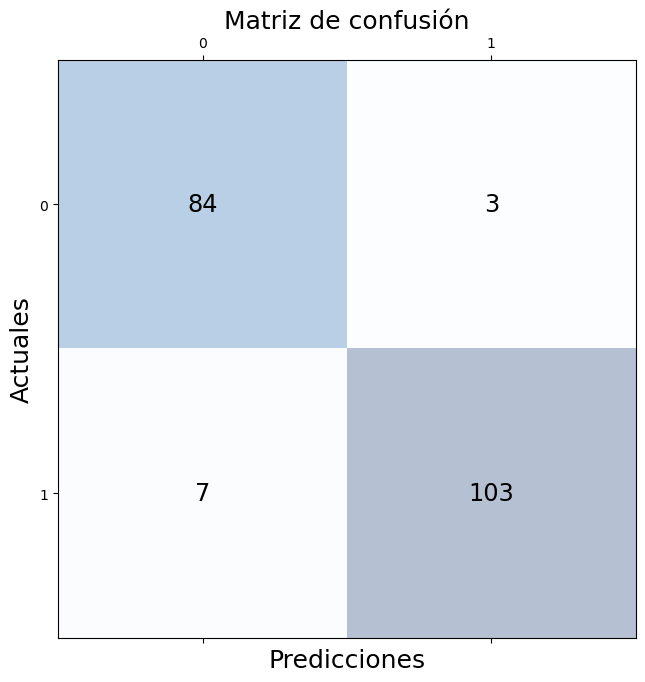

In [339]:
def draw_matrix(matrix):
    ig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicciones', fontsize=18)
    plt.ylabel('Actuales', fontsize=18)
    plt.title('Matriz de confusión', fontsize=18)
    plt.show()

draw_matrix(conf_matrix)